- df 一个DataFrame对象
- dy 一个ndarray 对象
- s 一个Serirs对象
- x 数据样本

In [2]:
import pandas as pd
import numpy as np
import sklearn.svm as svm
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.ensemble as ens
import sklearn.neighbors as neigh
import sklearn.preprocessing as prep
import sklearn.linear_model as lm
import imblearn.over_sampling as os
import imblearn.under_sampling as ius
from matplotlib import pyplot as plt

/Users/zhouwencheng/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/zhouwencheng/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zhouwencheng/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [6]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data = data.data, columns=['l1', 'l2', 'l3', 'l4'])
df['label'] = data.target
df.head()

,l1,l2,l3,l4,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
s = df.l1 
x = data.data
dy = np.array(data.data) 
y = data.target

# 基本操作
- np.median(dy)   获取dy的中位数
- (dy/df).min()/max() | 获取dy/df的最值.
- (dy/df).mean() | 获取dy/df的均值.
- (dy/df).std() | 获取dy/df的标准差.
- stats.mode(dy) | 获取dy的众数.
- df[’name’].map(str.upper/lower/title) 把df的特征name的取值转换为大写/小写/首字母大写.
- s.value_counts() | 统计s中各个取值的频数，默认 忽略缺失值，通过参数dropna进行调节.
- df.info() | 查看df的详细信息，包含是否含有空值， 取值类型，占用空间等.
- df.describe() | 查看df各个特征的统计信息，包含 均值，方差，最值等，自动忽略离散型特征.

In [12]:
np.median(dy)

3.2

In [15]:
print(dy.min())
df.min()


0.1


l1       4.3
l2       2.0
l3       1.0
l4       0.1
label    0.0
dtype: float64

In [16]:
print(dy.max())
df.max()

7.9


l1       7.9
l2       4.4
l3       6.9
l4       2.5
label    2.0
dtype: float64

In [17]:
print(dy.mean())
print(df.mean())

3.4644999999999997
l1       5.843333
l2       3.057333
l3       3.758000
l4       1.199333
label    1.000000
dtype: float64


In [18]:
print(dy.std())
df.std()

1.9738430577598278


l1       0.828066
l2       0.435866
l3       1.765298
l4       0.762238
label    0.819232
dtype: float64

In [20]:
stats.mode(dy)

ModeResult(mode=array([[5. , 3. , 1.4, 0.2]]), count=array([[10, 26, 13, 29]]))

In [22]:
s.value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: l1, dtype: int64

In [23]:
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
l1       150 non-null float64
l2       150 non-null float64
l3       150 non-null float64
l4       150 non-null float64
label    150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [25]:
df.describe()

,l1,l2,l3,l4,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 正态验证
- sm.qqplot(x) | 绘制分位数-分位数图. 
- stats.skewtest(x) | 进行偏度检验.
- stats.kurtosistest(x) | 进行峰度检验.
- stats.normaltest(x) | 进行正态性检验.
- stats.kstest(x) | 进行KS检验.
- stats.shapiro(x) | 进行W检验.

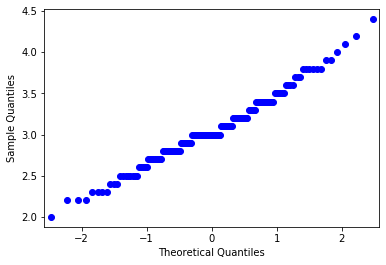

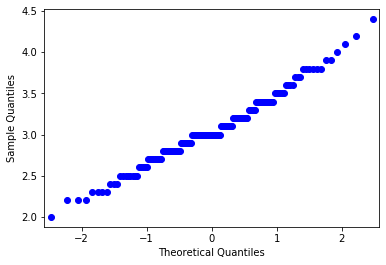

In [39]:
sm.qqplot(df.l2)

In [28]:
stats.skewtest(x)

SkewtestResult(statistic=array([ 1.59629751,  1.61604351, -1.3998796 , -0.53137496]), pvalue=array([0.11042239, 0.10608491, 0.16154938, 0.59515897]))

In [29]:
stats.kurtosistest(x)

KurtosistestResult(statistic=array([ -1.78533429,   0.71570637, -14.82321258, -11.71638195]), pvalue=array([7.42071108e-02, 4.74172676e-01, 1.03703722e-49, 1.05063934e-31]))

In [30]:
stats.normaltest(x)

NormaltestResult(statistic=array([  5.73558424,   3.12383225, 221.68729406, 137.55596543]), pvalue=array([5.68242494e-02, 2.09733810e-01, 7.26466750e-49, 1.34927859e-30]))

In [37]:
stats.kstest(df.l1, cdf='norm')

KstestResult(statistic=0.999991460094529, pvalue=0.0)

In [38]:
stats.shapiro(x)

(0.9636185169219971, 4.9483969005725825e-11)

# 非正态性检验
- np.log(x) | 进行自然对数变换. 
- np.log10(x) | 进行以10为底的对数变换. 
- stats.boxcox(x) | 进行box-cox变换.

In [41]:
np.log(x)[:4, :]

array([[ 1.62924054,  1.25276297,  0.33647224, -1.60943791],
       [ 1.58923521,  1.09861229,  0.33647224, -1.60943791],
       [ 1.54756251,  1.16315081,  0.26236426, -1.60943791],
       [ 1.5260563 ,  1.13140211,  0.40546511, -1.60943791]])

In [42]:
np.log10(x)[:4,:]

array([[ 0.70757018,  0.54406804,  0.14612804, -0.69897   ],
       [ 0.69019608,  0.47712125,  0.14612804, -0.69897   ],
       [ 0.67209786,  0.50514998,  0.11394335, -0.69897   ],
       [ 0.66275783,  0.49136169,  0.17609126, -0.69897   ]])

In [47]:
stats.boxcox(df.l2)

(array([1.50159875, 1.28708145, 1.3757643 , 1.33193718, 1.54181576,
        1.65783835, 1.46054687, 1.46054687, 1.24113742, 1.33193718,
        1.5812374 , 1.46054687, 1.28708145, 1.28708145, 1.69508334,
        1.83769463, 1.65783835, 1.50159875, 1.61990026, 1.61990026,
        1.46054687, 1.5812374 , 1.54181576, 1.41861747, 1.46054687,
        1.28708145, 1.46054687, 1.50159875, 1.46054687, 1.3757643 ,
        1.33193718, 1.46054687, 1.73166475, 1.76761016, 1.33193718,
        1.3757643 , 1.50159875, 1.54181576, 1.28708145, 1.46054687,
        1.50159875, 0.93845471, 1.3757643 , 1.50159875, 1.61990026,
        1.28708145, 1.61990026, 1.3757643 , 1.5812374 , 1.41861747,
        1.3757643 , 1.3757643 , 1.33193718, 0.93845471, 1.19403977,
        1.19403977, 1.41861747, 0.9925609 , 1.24113742, 1.14571671,
        0.76525861, 1.28708145, 0.88262968, 1.24113742, 1.24113742,
        1.33193718, 1.28708145, 1.14571671, 0.88262968, 1.0450696 ,
        1.3757643 , 1.19403977, 1.0450696 , 1.19

# 数据去重
- df.duplicated() | 返回一个布尔型对象, 用来检测 重复的行或列.
- df.drop_duplicated() | 返回删除重复行或者列的 DataFrame对象.

In [50]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [52]:
df.drop_duplicates().tail()

,l1,l2,l3,l4,label
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# 整合数据
- pd.merge() | merge函数通过一个或多个索引 将数据 集的行连接起来,键值可以为列标签或索引,类似于数据 库的JOIN操作; 该函数的主要应用场景是针对同一个主 键存在两张包含不同特征的表, 通过该主键的连接, 将 两张表进行合并.
- pd.concat() | pandas库以及它的Series和DataFrame 等数据结构实现了带编号的轴, concat()函数可以沿着 一条轴将多个对象堆叠到一起.
- df.combine_first() | 调用该方法组合两个 DataFrame对象, 适用于索引全部或部分重叠的两个数据 集, 合并后的索引和列是两个对象的并集.

# 数据组合
- df[‘person’].groupby(df[‘score’]) | score分组，根据sum()函数对特征person进行聚合，返 回一个groupby对象 .
- df.agg(custom_func) | 使用自定义聚合函数cus- tom_func对df进行分组.

# 数据不均衡

- os.SMOTE() | SMOTE过采样.
- os.ADASYN() | 基于自适应合成方法的过采样.
- os.RandomOverSampler() | 随机过采样，通过随机 添加少类样本达到数据平衡.
- ius.RandomUnderSampler() | 随机欠采样, 通过随 机删除多类样本达到数据平衡.
- ius.ClusterCentroids()|基于聚类的欠采样方法.

In [70]:
df_s_y = pd.DataFrame(data = y, columns=["label"])
df_s_y.label = df_s_y.label.map({0:0, 1:1, 2:0})
y2 = df_s_y.label.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
over_samples = os.SMOTE() 
over_x, over_y = over_samples.fit_sample(x, y2)
print(over_x.shape)
print(over_y.shape)
ds_y = pd.Series(data = over_y)
ds_y.value_counts()

(200, 4)
(200,)


1    100
0    100
dtype: int64

In [73]:
over_samples = os.ADASYN() 
over_x, over_y = over_samples.fit_sample(x, y2)
print(over_x.shape)
print(over_y.shape)
ds_y = pd.Series(data = over_y)
ds_y.value_counts()

(201, 4)
(201,)


1    101
0    100
dtype: int64

In [74]:
over_samples = os.RandomOverSampler()
over_x, over_y = over_samples.fit_sample(x, y2)
print(over_x.shape)
print(over_y.shape)
ds_y = pd.Series(data = over_y)
ds_y.value_counts()

(200, 4)
(200,)


1    100
0    100
dtype: int64

In [75]:
over_samples = ius.RandomUnderSampler()
over_x, over_y = over_samples.fit_sample(x, y2)
print(over_x.shape)
print(over_y.shape)
ds_y = pd.Series(data = over_y)
ds_y.value_counts()

(100, 4)
(100,)


1    50
0    50
dtype: int64

In [76]:
over_samples = ius.ClusterCentroids()
over_x, over_y = over_samples.fit_sample(x, y2)
print(over_x.shape)
print(over_y.shape)
ds_y = pd.Series(data = over_y)
ds_y.value_counts()

(100, 4)
(100,)


1    50
0    50
dtype: int64

# 缺失值表示
- NA | R语言中缺失值的表示方式.
- na | Matlab中缺失值的表示方式.
- None | Python语言中缺失值(空值)的表示方式，其类型 为object.
- np.nan/np.NaN | Numpy和Pandas中缺失值的表示方 式，其类型为浮点(float)型.

# 缺失值处理
- df.isnull() | 返回一个由布尔值组成的对象, 判断哪 些数据元素是缺失值，True表示为缺失值.
- df.notnull() | 返回一个由布尔值组成的对象, 判断 哪些数据元素不是缺失值，True表示不是缺失值.
- df.dropna() | 根据选定的轴标签axis, 删除含有缺 失值的行或者列, 可通过how参数调节删除数据的范围.
- df.fillna() | 通过method属性(如ffill或bfill)填 充缺失数据;也可以通过value指定填充的值或者字典对 象，如零值，均值，众数，中位数等.

# 异常值检测
- neigh.LocalOutierFactor() | 使用局部异常因子 算法进行异常值检测，给x的每一样本计算局部离群分 数，要求scikit-learn版本在0.19以上.
- svm.OneClassSVM() | 使用one class SVM算法进行 异常值检测, 其属于无监督，基于密度的异常值检测方 法，只需输入数据样本x即可.
- ens.IsolationForest() | 行异常值检测，当多颗决策树共同为特定样本产生较短 的路径长度时，该样本极可能是异常值，要求scikit- learn版本在0.19以上.
- x[abs(x-x.mean())>3*np.std(x)] | 使 用 拉 依 达 准则检测x中的异常值.
- plt.boxplot(x) | 通过绘制盒图对x进行可视化，检 测异常值.

In [85]:
clf = neigh.LocalOutlierFactor()
y_pred = clf.fit_predict(x)
scores_pred = clf.negative_outlier_factor_
threshold = stats.scoreatpercentile(scores_pred, 10)
threshold

/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/1env2/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


-1.3039354147339495

In [84]:
# -1 落在聚类外  1落在聚类内
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X)
y_pred_train = clf.predict(X)
y_pred_train

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [90]:
outliers_fraction = 0.25  #异常样本比例
# fit the model
clf = ens.IsolationForest(max_samples=150, random_state=100, contamination=outliers_fraction)
clf.fit(x)
# y_pred_train = clf.predict(X_train)
scores_pred = clf.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图
threshold

/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/1env2/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


0.010868362505475834

# 数据转换
- df.dtypes() | 查看df各个特征的类型，常见类型有 object，int，float和bool型.
- df.get_dytpe_counts() | 统计df各个特征的类型 数量.
- df[’age’].astype(‘float’) | 把df的age特征的 类型改为float型.


# 特征值编码
- prep.Binarizer(threshold=num) | 特征二值化编 码，特征取值大于num编码为1，小于num取值为0.
- prep.OnehotEncoder()| One-hot特征编码, 输入变 量必须是2维ndarry或者DataFrame.
- prep.LabelEncoder()| 对数据样本的标签特征进行 数字编码，编码后的标签取值范围为[0, nclass -1].
- prep.LabelBinarizer()| 对数据样本的标签特征进 行二值化编码，编码后的标签取值为{0, 1}，默认正类 标签为1，负类标签为0.
- pd.get_dummies(x) | 使用Pandas模块对x进行One- hot特征编码.

In [95]:
transformer = prep.Binarizer(2).fit(x)
transformer.transform(x)[:4, :]

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

In [103]:
x_sub = x[:4,:]
print(x_sub)
# prep.OnehotEncoder().fit(x_sub).transform(x_sub)
prep.OneHotEncoder().fit(x_sub).transform(x_sub).toarray()

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


/Users/zhouwencheng/Desktop/Grass/02Study/02PythonEnv/1env2/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 0., 1., 1., 1.]])

In [106]:
y_sub = y[45:55]
print(y_sub)
prep.LabelEncoder().fit(y_sub).transform(y_sub)


[0 0 0 0 0 1 1 1 1 1]


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [110]:
pd.get_dummies(df.label)

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


# 数据标准化
- prep.MinMaxScaler() | Min-Max标准化. 
- prep.StandardScaler() | Z-score标准化.

In [114]:
p = prep.MinMaxScaler()
p.fit(x).transform(x)[:4, :]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667]])

In [113]:
p = prep.StandardScaler()
p.fit(x).transform(x)[:4, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

# 特征离散化
- pd.cut(x, bins) | 对x进行离散化，子区间端点集合 为数组bins.
- pd.cut(x, num) | 对x进行等距离散化，子区间个数 为num.
- pd.qcut(x, 4) | 按照四分位数进行离散化

In [121]:
pd.cut(df.l2, bins=[1, 2, 3,10]).value_counts()

(2, 3]     82
(3, 10]    67
(1, 2]      1
Name: l2, dtype: int64

In [122]:
pd.cut(df.l2, 3).value_counts()

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: l2, dtype: int64

In [123]:
pd.qcut(df.l2, 4).value_counts()

(1.999, 2.8]    47
(3.3, 4.4]      37
(2.8, 3.0]      36
(3.0, 3.3]      30
Name: l2, dtype: int64